<a href="https://colab.research.google.com/github/priyakathuria/mobilepriceclassification/blob/main/Project1_Mobile_Price_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Downloading the dataset directly from kaggle

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d iabhishekofficial/mobile-price-classification
! unzip mobile-price-classification.zip

## 2. Importing the required libraries and accessing the data

In [57]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
pd.set_option('display.max_columns', None)

In [53]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [54]:
print(f'Shape of training dataframe: {train_data.shape}')
print(f'Shape of testing dataframe: {test_data.shape}')

Shape of training dataframe: (2000, 21)
Shape of testing dataframe: (1000, 21)


In [56]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# 3. Exploratory Data Analysis

### Check_1 : No of null values in dataset

In [71]:
train_data.isna().sum().any()

False

In [72]:
test_data.isna().sum().any()

False

0 null values in training and test dataset

### Check_2 : No of Categorical col in dataset

In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [120]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Check_3 : Any duplicates in the training data

In [75]:
print(train_data.duplicated().any())


False


### Check_4 : Data distribution of target variable

In [76]:
train_data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<Axes: >

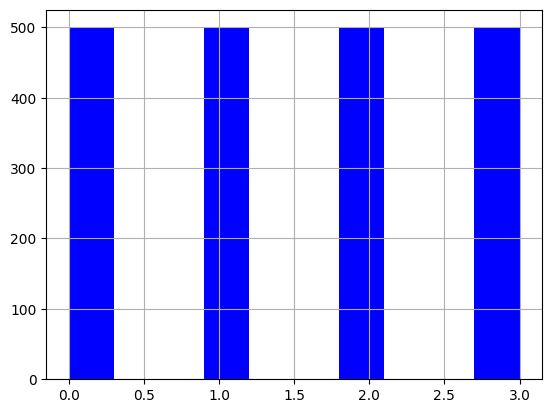

In [77]:
train_data['price_range'].hist(color="blue")

500 mobile phones in each of the following categories: low cost, medium cost, high cost, and very high cost

### Check_5 : Analysing the relationship between variables-Correlation

Text(0.5, 1.0, 'Correlation between variables')

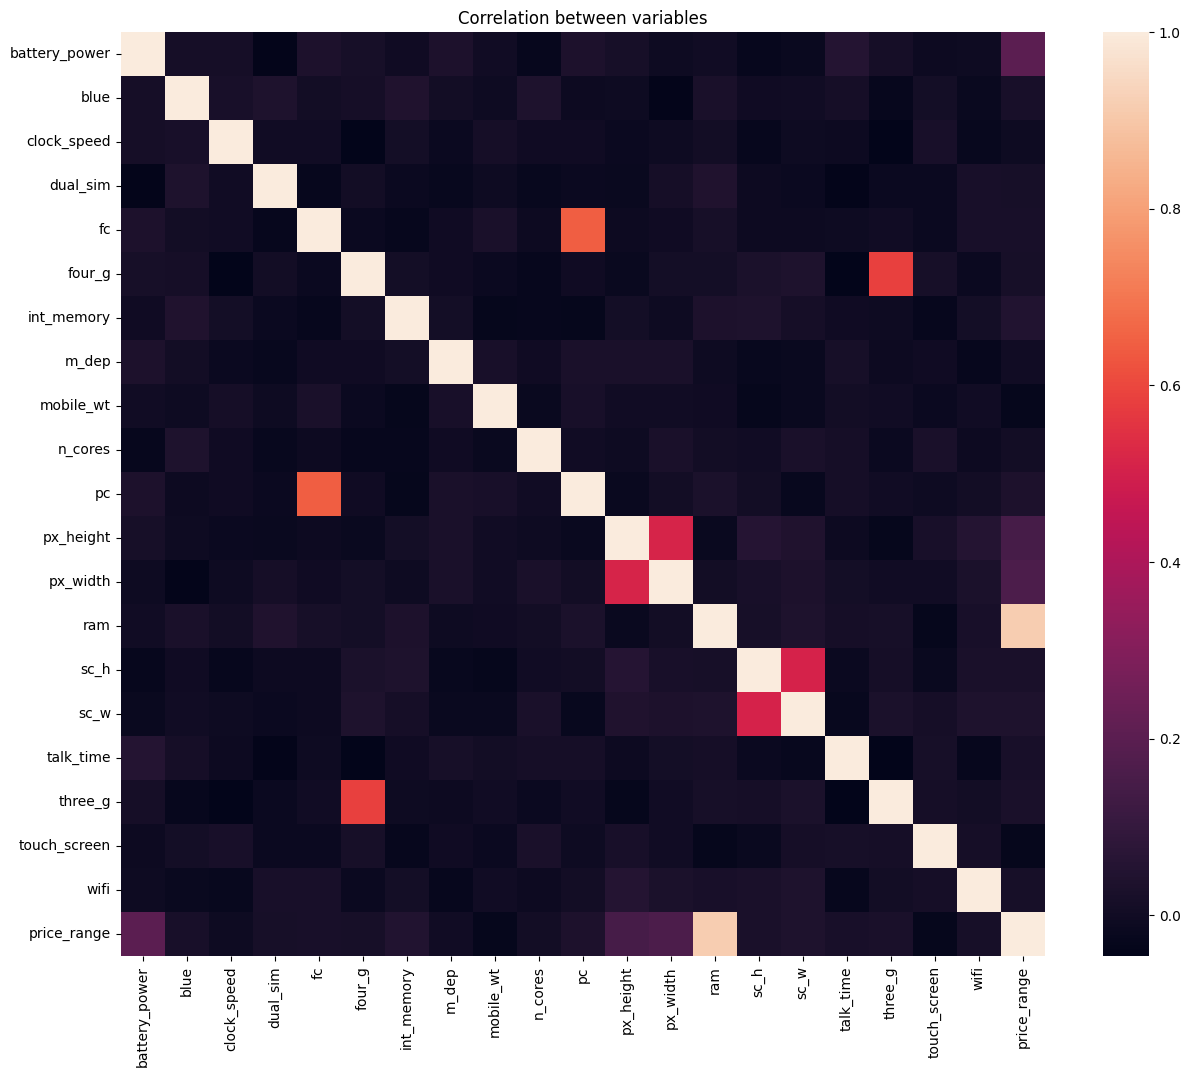

In [78]:
corr=train_data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, square = True)
r.set_title("Correlation between variables")

Conclusion from Correlation matrix:
>Price Range has strong correlation with RAM.
>The other relations between variables:
1. 3G and 4G
2. pc(Primary Camera mega pixels) and fc(Front Camera mega pixels)
3. px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height)
4. sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm)
* Features have highly positive correlation. For example as long as sc_w (screen width of mobile) increase, sc_h(screen height of mobile) is increasing.

### Check_6 : Analysing the relationship between target variable and other features in dataset

**Display highest correlations between price_range and the other features in our dataset**

In [79]:
corr.abs()['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
Name: price_range, dtype: float64

Text(0.5, 1.0, 'Correlation between Attributes and Price Range')

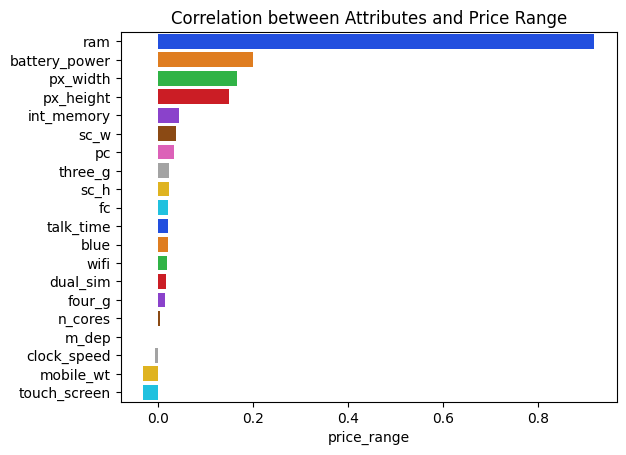

In [80]:
#we are not considering the correlations between X features among themselves
corr = train_data.corr()
corr = corr.price_range
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr, y=cr.index,palette = "bright")
plt.title("Correlation between Attributes and Price Range")

The highest correlations to our target variable (price_range) are:
1. RAM
2. battery_power
3. px_width
4. px_height

**Key Variables Visualisation**

1. Price Range and RAM

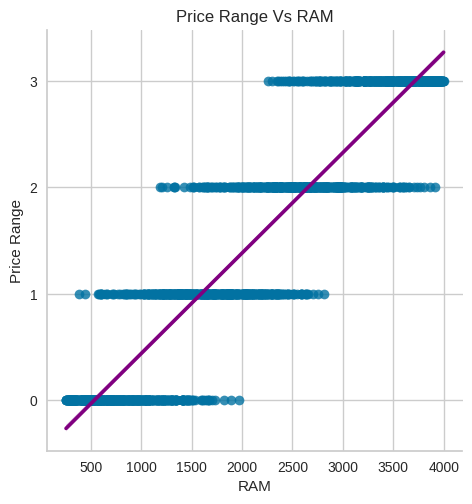

In [118]:
sns.lmplot(x='ram', y='price_range', data=train_data, line_kws={'color': 'purple'})
plt.yticks([0, 1, 2, 3])
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.title("Price Range Vs RAM")
plt.show()

The plot aboves shows the high correlation between RAM and price range. It shows the general pattern: as RAM increases, mobile's price increases

2. Price Range and batery power

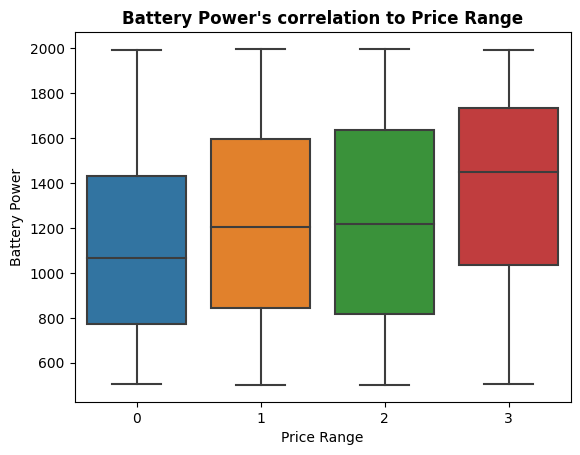

In [82]:
sns.boxplot(x='price_range', y='battery_power', data=train_data)
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.title('Battery Power\'s correlation to Price Range', weight='bold')
plt.show()

### Check_7 : Visualising all the input features

Text(0.5, 0.98, 'Visualising all the input features')

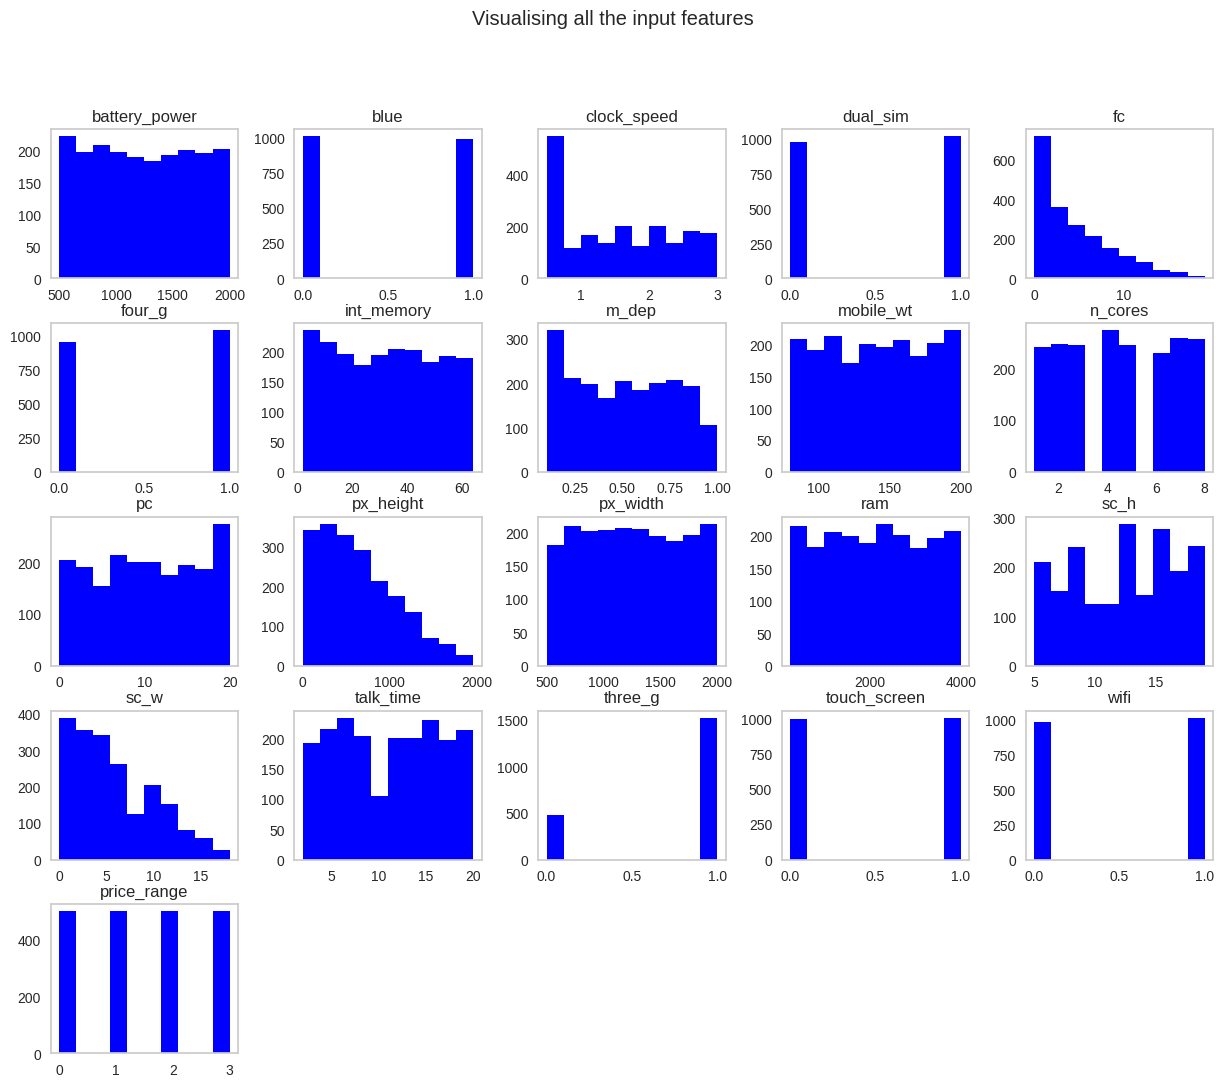

In [119]:
train_data.hist(layout=(5,5),color="blue", figsize=(15,12), grid=False)
plt.suptitle("Visualising all the input features")

### Check_8 : Outlier Analysis of Non-Categorical Data

In [84]:
features=train_data.columns

In [85]:
non_cat_attributes=['battery_power','clock_speed','fc','pc','px_width','sc_h','int_memory','m_dep','mobile_wt','n_cores','px_height','ram','sc_w','talk_time']

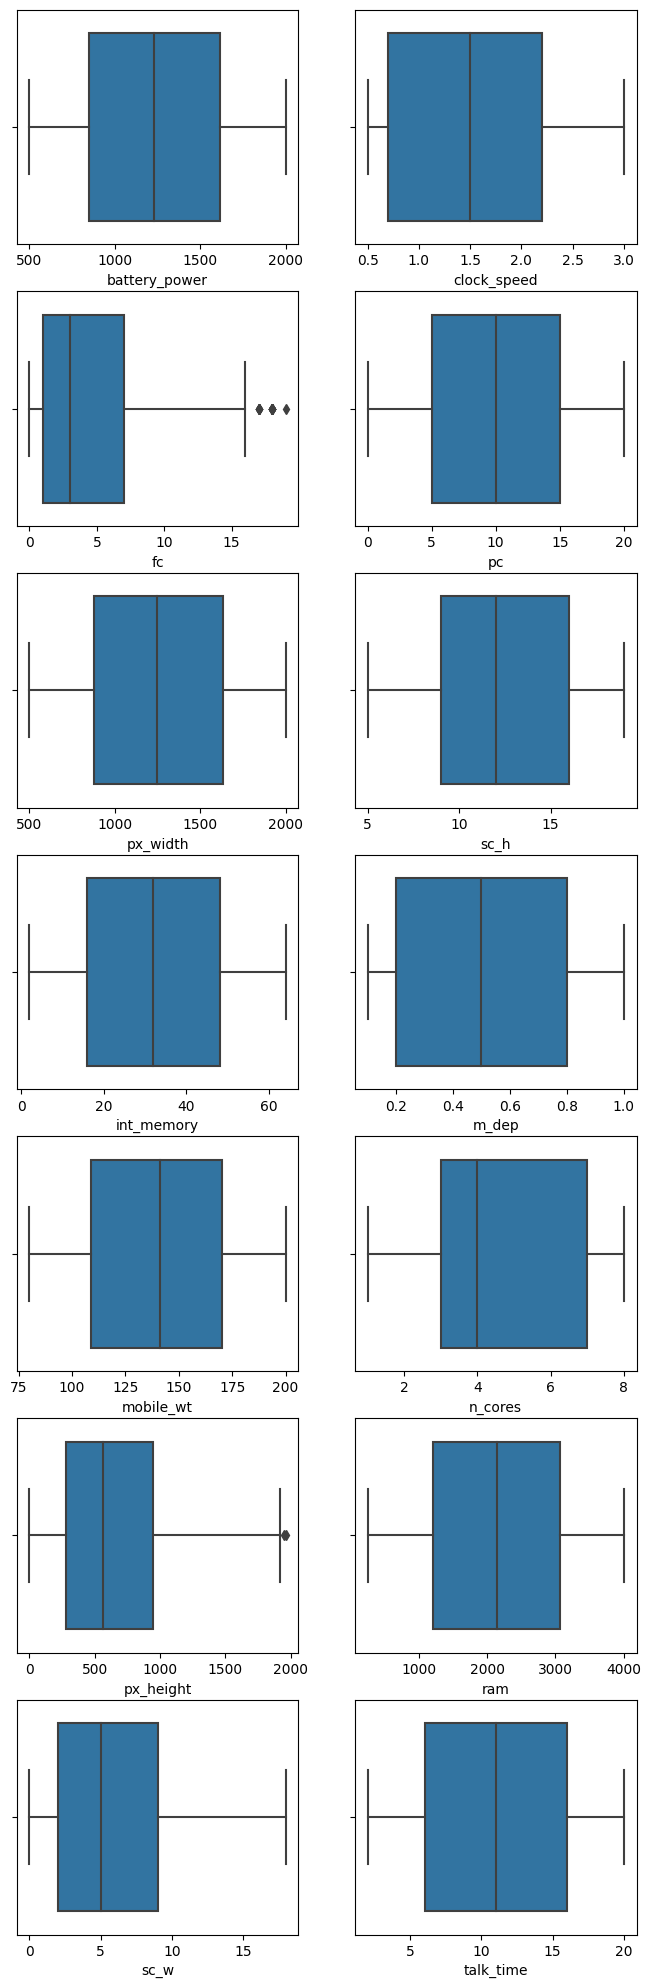

In [86]:
fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(8,25))
k=0
for i in range(7):
  for j in range (2):
    sns.boxplot(x=train_data[non_cat_attributes[k]],ax=ax[i,j])
    k=k+1


There are a few outliers in fc and px_height only.

### Check_9 : Visualising and analysing the data in 2D

In [88]:
x,y = train_data.iloc[:,0:-1], train_data.iloc[:,-1]
print(x.shape)
print(y.shape)

(2000, 20)
(2000,)


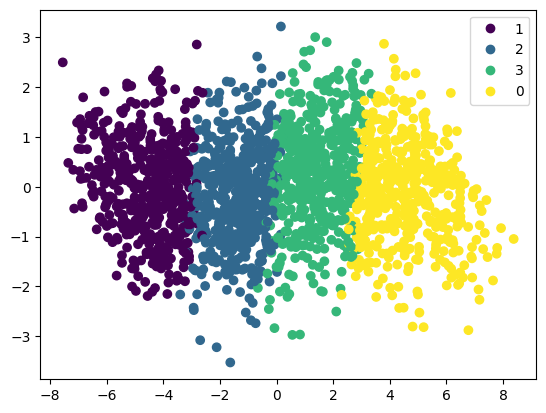

In [91]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
Xt = lda.fit_transform(x,y)
#plot = plt.scatter(Xt[:,0], Xt[:,1])
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(train_data['price_range'].unique()))
plt.show()

# 4.  Data Preprocessing

### 1. Check the no of outliers to be removed using Z-score

In [106]:
z = np.abs(stats.zscore(train_data))

In [107]:
threshold = 3
print(np.where(z > threshold))

(array([  95,  226,  305, 1387, 1406, 1416, 1554, 1693, 1705, 1880, 1882,
       1888]), array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]))


In [108]:
train_data_out1 = train_data[(z < 3).all(axis=1)]

In [109]:
train_data_out1.shape

(1988, 21)

Since the no of outliers are so less (12 out of 2000 rows) , it will not affect the model results and can be incorporated in the model

### 2. Splitting the train and test dataset

In [110]:
#Splitting the training and testing dataset
from sklearn.model_selection import train_test_split
# Splitting of data
x,y = train_data.iloc[:,0:-1], train_data.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [111]:
x_train.shape

(1600, 20)

In [112]:
x_test.shape

(400, 20)

### 3. Class Imbalance Check

In [116]:
train_data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

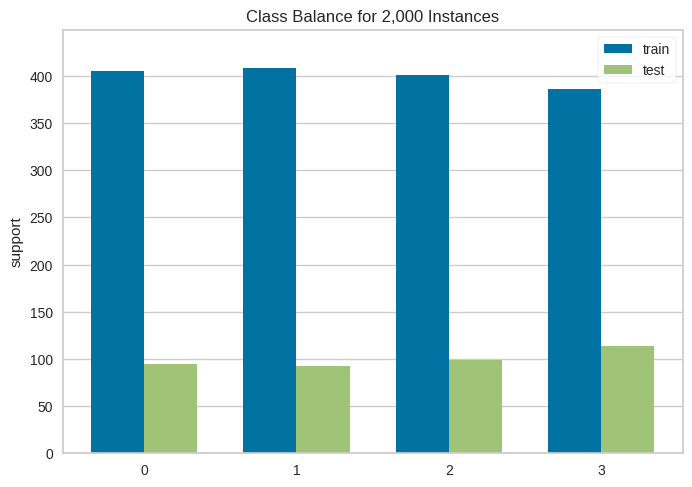

In [113]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=["0","1","2","3"])
visualizer.fit(y_train, y_test)
visualizer.poof()
plt.show()

There is no class imbalance in the data

### 4. Scaling of data

In [114]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col = train_data.iloc[:,:20].columns
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [115]:
x_train

array([[ 0.44945522,  0.91370804, -1.18677697, ...,  0.53881591,
         0.91832346, -0.97043679],
       [-0.39685317,  0.91370804, -1.18677697, ..., -1.85592145,
         0.91832346, -0.97043679],
       [ 0.61310601,  0.91370804,  0.41240423, ...,  0.53881591,
        -1.08894093,  1.03046381],
       ...,
       [-1.56111168,  0.91370804,  1.39651574, ..., -1.85592145,
         0.91832346,  1.03046381],
       [ 0.96144841,  0.91370804,  0.16637635, ..., -1.85592145,
        -1.08894093, -0.97043679],
       [ 0.06604478, -1.0944415 , -1.18677697, ..., -1.85592145,
         0.91832346,  1.03046381]])